# Titanic Dataset Investigation

### "Women and Children first!" became a popular code of conduct after the Titanic sank in 1912. 

### It also inspired the first questions I thought of when I first saw the Titanic survivor dataset: 
1) Did both women and children indeed have a better likelihood of survival as compared to men? <br>
2) And between women and children groups, were their chances of survival significantly different? 

I'll be exploring these questions in the following analysis


# Importing the data

<p>The first step in my analysis of the titanic data set was to import the data into a dataframe using the passenger id as the index and just explore the structure of the dataset using the head method.</p>

In [1]:
##import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.figure as fgr
from matplotlib.axes import Subplot
import seaborn as sns
import scipy.stats as scistat

## read in the datasets

titanic_df_init = pd.read_csv('C:/Users/Abhi/Downloads/Datasets/titanic_data.csv')

## setting the passenger id as the index for the dataframe
titanic_df = titanic_df_init.set_index('PassengerId')

print titanic_df.head()

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex  Age  \
PassengerId                                                                   
1                                      Braund, Mr. Owen Harris    male   22   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female   38   
3                                       Heikkinen, Miss. Laina  female   26   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female   35   
5                                     Allen, Mr. William Henry    male   35   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2   

C:\Users\Abhi\Anaconda2\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# Data Wrangling

<p>Looking at the dataset, I decided that it was first critical to wrangle the data into the structures that would make analysis easier later on. In doing so I set out to perform a few wrangling tasks:</p>

a. To make some computation and analysis work with the gender of passengers easier, I decided to add a **"Gender"** column to illustrate **male/female** with the numberical keys **0/1** instead.

b. I was finding it problematic that the Age column had several Nan values and I thought this would make analysis work where Age was involved a bit difficult to generalize to the dataset. So I took some inspiration from <a>https://www.kaggle.com/c/titanic/details/getting-started-with-python-ii</a> to fill the age value for a passenger without an age value based on the median age of people of their gender and class of travel. 

c. Finally, keeping in mind that my orignal question enquires about children, I thought it might be useful to create a **"Who"** column to seperate between **men, women and children** (below 18 years old) in the passenger dataset. This enabled me to look at the children data in greater detail later.

d. In the end, I dropped columns that I was quite sure I wouldn't be interested in looking at in this analysis

In [2]:
## Replacing male/female with binary values 0/1
titanic_df['Gender'] = titanic_df['Sex']
titanic_df['Gender'] = titanic_df['Sex'].dropna().map({'male' : 0, 'female': 1})

## Calculating the median age values for each gender by class
median_age_class = np.ones((2,3))

for i in range(0,2):
    for j in range(0,3):
        median_age_class[i,j] = \
        titanic_df[(titanic_df['Gender'] == i) & (titanic_df['Pclass'] == j + 1)]['Age'].dropna().median()

## Creating a complete age column by replacing Nan values with appropriate median age as per gender and class
titanic_df['AgeFill'] = titanic_df['Age']

## Filling in the AgeFill column with the median ages estimated as per class and gender of passenger (Kaggle)
for i in range(0, 2):
    for j in range(0, 3):
        titanic_df.loc[ (titanic_df.Age.isnull()) & (titanic_df.Gender == i) & (titanic_df.Pclass == j+1),\
                'AgeFill'] = median_age_class[i,j]  
        
## Creating a who column to classify by (man, woman, child)
titanic_df['Who'] = titanic_df['Sex']
titanic_df.loc[(titanic_df['AgeFill'] < 18),'Who'] = 'child'

##Dropping the columns that I was surely not going to use in my analysis
titanic_df = titanic_df.drop(['Age','Name','Sex','Ticket','Cabin','Embarked','SibSp','Parch'], axis = 1)

##Printing out the new data structure
print 'New working data structure for Titanic Dataset'
print titanic_df.tail(12)


New working data structure for Titanic Dataset
             Survived  Pclass     Fare  Gender  AgeFill     Who
PassengerId                                                    
880                 1       1  83.1583       1     56.0  female
881                 1       2  26.0000       1     25.0  female
882                 0       3   7.8958       0     33.0    male
883                 0       3  10.5167       1     22.0  female
884                 0       2  10.5000       0     28.0    male
885                 0       3   7.0500       0     25.0    male
886                 0       3  29.1250       1     39.0  female
887                 0       2  13.0000       0     27.0    male
888                 1       1  30.0000       1     19.0  female
889                 0       3  23.4500       1     21.5  female
890                 1       1  30.0000       0     26.0    male
891                 0       3   7.7500       0     32.0    male


# Exploring the data

## Single Variable Analysis

To get to know the distribution of the dataset a little better, I decided to explore the individual features in the dataset for visual trends using 3 tools:

1) I used to boxplot for continuous variables (Age and Fare) to give me a quick indication of how the different columns were distributed, how "normal" they were and whether any of them were significantly influenced by outliers

2) Then I used histograms to better understand the distribution of individual columns of age and fare. 

3) Then for the categorical variables (Survival, Class and Gender), I used bar charts to help me understand their distributions

3) Finally I wanted to see if there were any strong correlations between the features and also have a look at the basic descriptive statistics for the features. I used the corr() and describe() functions to do this 


         Survived      Pclass        Fare      Gender     AgeFill
count  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   32.204208    0.352413   29.112424
std      0.486592    0.836071   49.693429    0.477990   13.304424
min      0.000000    1.000000    0.000000    0.000000    0.420000
25%      0.000000    2.000000    7.910400    0.000000   21.500000
50%      0.000000    3.000000   14.454200    0.000000   26.000000
75%      1.000000    3.000000   31.000000    1.000000   36.000000
max      1.000000    3.000000  512.329200    1.000000   80.000000


C:\Users\Abhi\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020363828>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A94E4E0>]], dtype=object)

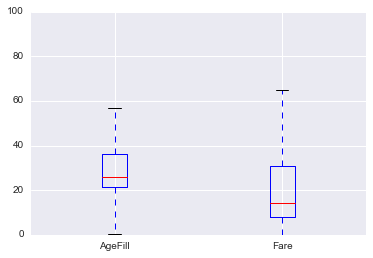

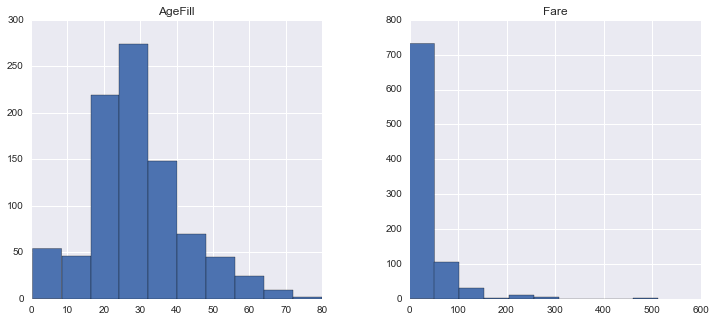

In [4]:
%matplotlib inline

## Basic descriptive statistics of the whole dataset
print titanic_df.describe()

##Exploring the features age and fare with a boxplot and histograms for non categorical columns
titanic_df[['AgeFill','Fare']].boxplot()
plt.ylim(ymax = 100)
titanic_df[['AgeFill','Fare']].hist(figsize = (12,5))

C:\Users\Abhi\Anaconda2\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


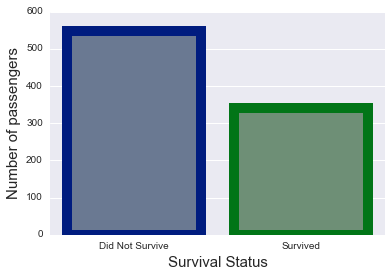

In [5]:
#Exploring the feature 'Survived' with the help of a bar chart

a1 = sns.countplot(x = 'Survived', data = titanic_df, saturation = 0.4,  linewidth=10, edgecolor=sns.color_palette("dark", 3))
a1.set_xticklabels(['Did Not Survive', 'Survived'])
a1.set_xlabel('Survival Status', fontsize = 15)
a1.set_ylabel('Number of passengers', fontsize = 15)

(0, 600)

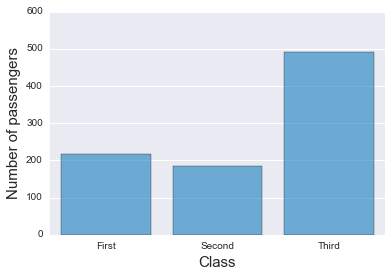

In [6]:
#Exploring the feature 'Pclass' with the help of a bar chart
a2 = sns.countplot(x = 'Pclass', data = titanic_df, order = (1,2,3), facecolor = (0.1,0.5,0.75, 0.6) )
a2.set_xticklabels(['First', 'Second', 'Third'])
a2.set_xlabel('Class', fontsize = 15)
a2.set_ylabel('Number of passengers', fontsize = 15)
a2.set_ylim(0,600)

[<matplotlib.text.Text at 0x1a2e8240>, <matplotlib.text.Text at 0x1a2d3828>]

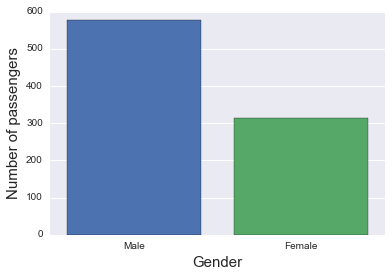

In [8]:
#Exploring the feature 'Gender' with the help of a bar chart
a3 = sns.countplot(x = 'Gender', data = titanic_df, order = (0,1), saturation = 1)
a3.set_xlabel('Gender', fontsize = 15)
a3.set_ylabel('Number of passengers', fontsize = 15)
a3.set_xticklabels(['Male', 'Female'])

In [9]:
## Getting the Correlations between all the columns
print titanic_df.corr()

          Survived    Pclass      Fare    Gender   AgeFill
Survived  1.000000 -0.338481  0.257307  0.543351 -0.059579
Pclass   -0.338481  1.000000 -0.549500 -0.131900 -0.413583
Fare      0.257307 -0.549500  1.000000  0.182333  0.122692
Gender    0.543351 -0.131900  0.182333  1.000000 -0.102706
AgeFill  -0.059579 -0.413583  0.122692 -0.102706  1.000000


## Multi-variable analysis

Next I wanted to start directly exploring my original question of whether women and children had a different likelihood of surviving than men and whether there was a difference in the likelihood of women surviving vs children.

The hypotheses that my questions are represented by are as follows:

a) H0a: There is no significant difference between the likelihood of a man surviving as compared to the likelihood of a women and child surviving:

                                            μm = μfc
                                            
   H1a: The likelihood of a women or child surviving the titanic is different from that of a man
   
                                            μm < μfc
                                            
b) H0b: There is no significant difference between the likelihood of a woman surviving and that of child surviving

                                            μf = μc
   
   H1b: There is a significant difference between the likelihood of a woman surviving and that of a child surviving.
   
                                            μf ≠ μc

Before performing a statistical test, I wanted to have a look at the relationship between the independent variable ('Who' feature) and the likelihood/probability of survival (the dependent variable).

Who
child     0.539823
female    0.752896
male      0.165703
Name: Survived, dtype: float64


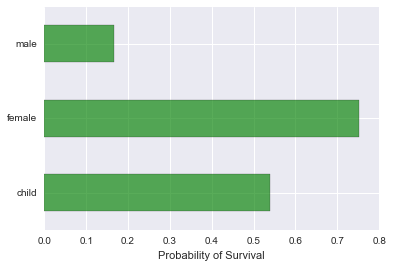

In [21]:
##Calculating probability of survival against the 'Who' feature

prob_surv = titanic_df.groupby('Who')['Survived'].mean()

print prob_surv #printing the probability of survival values

#Plotting probability of survival against the 'Who' feature using a horizontal bar chart
prob_surv.plot(kind = 'barh', color = 'g', alpha = 0.65)
plt.xlabel('Probability of Survival')
plt.ylabel('')

The chart above seemed to suggest that women and children have a better chance of survival as compared to men. 

So I decided to proceed to use a chi-square test to test my hypothesis statistically for a)

And a chi-square test to test my hypothesis for b)


### Hypothesis a

In [41]:

##Creating dataframes of the appropriate views in preparation for statistical tests
female_df = titanic_df[titanic_df['Who'] == 'female']
child_df = titanic_df[titanic_df['Who'] == 'child']
men_df = titanic_df[titanic_df['Who'] == 'male']
wom_and_chi_df = pd.concat([female_df,child_df])

##Creating the contingency table for the chi-square test
wom_and_chi_table = wom_and_chi_df['Survived'].value_counts()
men_table = men_df['Survived'].value_counts()
con_table_a = pd.concat([wom_and_chi_table, men_table], axis = 1, keys = ['women&child','men'])
print con_table_a

## Chi Square Test to check hypothesis a (ie. if women and children were more likely to survive than men)
scistat.chi2_contingency(con_table_a)

   women&child  men
0          116  433
1          256   86


(247.89376878705227,
 7.4752324786817778e-56,
 1L,
 array([[ 229.21212121,  319.78787879],
        [ 142.78787879,  199.21212121]]))

Based on the above test, the p value is below 0.01 (alpha level is 0.05) and we can definitely conclude that survival and who you were are not independent variables (ie. your survival was influenced by whether you were a women/child or a man). After comparing the observed and expected frequencies of the two groups however, we can tentatively conclude that women&children were more likely to survive that men.

### Hypothesis b

For my second hypothesis that women and children do not have the same likelihood of survival, I also used a chi squared test.

In [44]:
##Creating the contingency table for the chi-square test
female_table = female_df['Survived'].value_counts()
child_table = child_df['Survived'].value_counts()
con_table_b = pd.concat([female_table, child_table], axis = 1, keys = ['women','children'])

print con_table_b #Printing the contingency table

## Chi square to check hypothesis b (ie. that women and children did not have the same likelihood of suvival)
scistat.chi2_contingency(con_table_b)

   women  children
1    195        61
0     64        52


(15.666699994138392,
 7.5542562057434262e-05,
 1L,
 array([[ 178.23655914,   77.76344086],
        [  80.76344086,   35.23655914]]))

Based on the above test, the p value is below 0.01 (alpha= 0.05) and therefore **we reject the null hypothesis**

The result of the test seems to suggest that there indeed a significant relationship between survival and whether they were women or children. (ie. survival was affected by whether you were a women or a child)

I decided to go back to the dataset and check if there are other variables that could be spuriously affecting the 'Who' --> 'Surivived' relationship (especially in the case of women and children)

To do this I wanted to look at the descriptive statistics for the women and children group separately using the describe funciton

In [7]:
## Descriptive statistics for the passengers who were children
child_df.describe()


,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.539823,2.584071,1.460177,1.053097,31.220798,0.486726,9.041327
std,0.500632,0.677781,1.625881,0.800008,32.538092,0.502050,6.030408
min,0.000000,1.000000,0.000000,0.000000,7.054200,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,12.287500,0.000000,3.000000
50%,1.000000,3.000000,1.000000,1.000000,23.000000,0.000000,9.000000
75%,1.000000,3.000000,3.000000,2.000000,34.375000,1.000000,16.000000
max,1.000000,3.000000,5.000000,3.000000,211.337500,1.000000,17.000000


In [8]:
#Descriptive statistics for the female passengers
female_df.describe()

,Survived,Pclass,SibSp,Parch,Fare,Gender,AgeFill
count,259.000000,259.000000,259.000000,259.000000,259.000000,259,259.000000
mean,0.752896,2.088803,0.586873,0.567568,46.963772,1,31.088803
std,0.432163,0.864811,1.057999,1.044676,61.269415,0,10.840270
min,0.000000,1.000000,0.000000,0.000000,6.750000,1,18.000000
25%,1.000000,1.000000,0.000000,0.000000,10.508350,1,21.500000
50%,1.000000,2.000000,0.000000,0.000000,23.250000,1,29.000000
75%,1.000000,3.000000,1.000000,1.000000,65.800000,1,37.500000
max,1.000000,3.000000,8.000000,6.000000,512.329200,1,63.000000


Something that caught my eye when I looked at the descriptive statistics was the difference in the average class of travel between the two groups (female and child), so i decided to plot that using seaborn's countplot

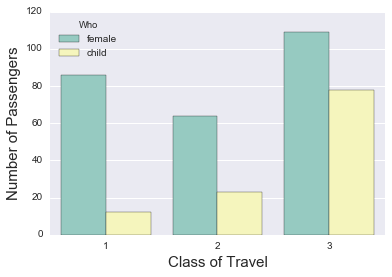

In [9]:
p1 = sns.countplot(x = 'Pclass', hue = 'Who', data = wom_and_chi_df ,order = (1,2,3), palette = 'Set3')
plt.ylabel('Number of Passengers', fontsize = 15)
plt.xlabel('Class of Travel', fontsize = 15)
sns.despine()

The visualization above was interesting to me because it demonstrated that the number of children increased as we got into the lower classes (taking 3 as lowest class) while the number of adult female passengers was lowest in class 2 and higher in classes 1 and 3. 

This suggested two things to me:

1) Maybe the average class of adult female passengers was higher than the average class of children and

2) That class of the passenger could be the confounding variable (that is causing the difference in survival rate between women and children) if class of travel significantly affected the likelihood of survival for the whole sample. (ie. higher class passengers had a better chance of survival)


I decided to explore these ideas statistically.

In [51]:
# Looking at the average class travelled by gender
print titanic_df.groupby('Who')['Pclass'].mean()

Who
child     2.584071
female    2.088803
male      2.358382
Name: Pclass, dtype: float64


In [50]:
# Checking if who you are and class of travel are independent using a chi square test

#Contingency table for chi square test
women2_table = titanic_df[titanic_df['Who'] == 'female']['Pclass'].value_counts()
child2_table = titanic_df[titanic_df['Who'] == 'child']['Pclass'].value_counts()
con_table_d = pd.concat([women2_table, child2_table], axis = 1, keys = ['Women','Children'])

print con_table_d

#Chi Square test for independence
print scistat.chi2_contingency(con_table_d)

   Women  Children
1     86        12
2     64        23
3    109        78
(27.232044246662113, 1.2207780906029707e-06, 2L, array([[  68.2311828 ,   29.7688172 ],
       [  60.57258065,   26.42741935],
       [ 130.19623656,   56.80376344]]))


In [46]:
# Looking at the probability of survival by class
print titanic_df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [49]:
# Checking if class of travel and survival are independent using a chi square test

#Contingency table for chi square test
class1_table = titanic_df[titanic_df['Pclass'] == 1]['Survived'].value_counts()
class2_table = titanic_df[titanic_df['Pclass'] == 2]['Survived'].value_counts()
class3_table = titanic_df[titanic_df['Pclass'] == 3]['Survived'].value_counts()
con_table_c = pd.concat([class1_table, class2_table, class3_table], axis = 1, keys = ['First Class','Second Class','Third Class'])

print con_table_c

#Chi Square test for independence
print scistat.chi2_contingency(con_table_c)

   First Class  Second Class  Third Class
0           80            97          372
1          136            87          119
(102.88898875696056, 4.5492517112987927e-23, 2L, array([[ 133.09090909,  113.37373737,  302.53535354],
       [  82.90909091,   70.62626263,  188.46464646]]))


Both tests suggest upon testing at a 0.05 alpha level that the variables being tested are not independent:

a) Adult females on average travelled in different classes as compared to children

b) Survival depended on which class you were in.

Comparing the value differences in the mean analysis and the observed and expected contingency tables in both cases however leads us to suspect that:

a) Adult females on average travelled in higher classes than children

b) The higher classes were more likely to survive.

# In Conclusion

In response to my original questions, I found that 

1) Women and children were more likely to survive than men and also 

2) That women were more likely to survive than children.

However the second conclusion has a possible confounding variable in the Class of Travel because it was found that class of travel affected likelihood of survival and it also seemed like significantly more children travelled by lower classes as compared to adult females. 


# Limitations of analysis

During the course of my analysis, I dropped the Parch and SibSp features quite early on when they could have had impacts on the questions that I was asking (maybe only women and children with family onboard had a high chance of surviving?). The effects of these features are defintely worth exploring.

I also used Chi Square tests frequently when categorical variables were involved. These tests tell us whether two variables are independent/dependent but do not necessarily tell us the direction of the dependence. I have only inferred the direction of the relationship from means.  

In filling the ages of passengers with no age in the dataset, I largely filled the missing ages with median values that were likely to cause under representation of groups like children. It might have been more prudent to look for information in the name of the passenger as well (master/mr etc.) in order to determine an age.

Further to the points above, there are several variables not present in the dataset that may have affected the results of my analysis. Perhaps passengers who knew how to swim or were in better physical shape were more likely to get to the lifeboats? Maybe where on the ship (port or starboard) passengers had their cabin made affected their survival chances? Maybe the area near the play area (where children are more likely to be) sank first?